In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Stock_Price_data_set.csv")

In [3]:
tested_data=data.copy()

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
data.shape

(1009, 7)

In [6]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [7]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

In [9]:
model=LinearRegression()

In [10]:
x=data[['Open','High','Low','Volume']]
y=data[['Close']]

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
x_test

,Open,High,Low,Volume
628,498.649994,510.440002,498.649994,5608000
631,505.450012,508.290009,486.679993,5910300
741,507.350006,514.500000,499.579987,4177400
514,385.329987,387.320007,377.899994,3930100
365,323.399994,325.850006,314.230011,16302500
...,...,...,...,...
780,512.500000,526.510010,506.589996,3981700
334,354.380005,357.880005,348.709991,5020100
210,288.130005,295.739990,274.720001,12800600
350,363.200012,370.850006,363.200012,4138600


In [13]:
model.fit(x_train,y_train)

LinearRegression()

In [14]:
model.score(x_test,y_test)

0.9986297713881204

In [15]:
y_pred=model.predict(x_test)

In [16]:
result = model.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[[257.74532336]]


C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 15.977
RMSE 3.997
MAE 2.857
MAPE 0.007
R2 Score :  0.999


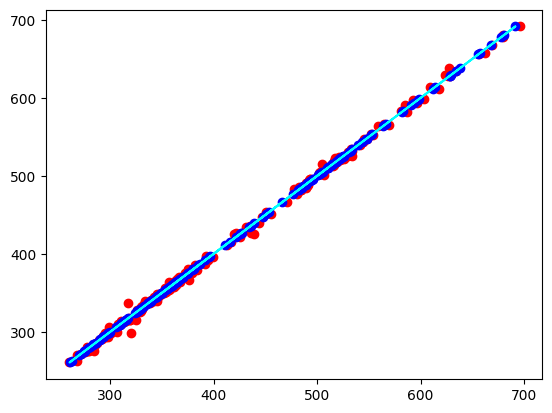

In [18]:
plt.scatter(y_pred, y_test, color='red')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='cyan')

In [19]:
y_predicted=model.predict(x)

In [27]:
tested_data["Close_predicted"]=y_predicted


In [28]:
tested_data

,Date,Open,High,Low,Close,Adj Close,Volume,Close_predicted
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,257.745323
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,261.665780
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,270.054022
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,254.031380
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,242.184414
...,...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,421.317175
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,449.398036
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,434.511102
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200,414.301072


In [29]:
tested_data['Date']=pd.to_datetime(tested_data['Date'],format='%Y-%m-%d')

In [30]:
tested_data.dtypes

Date               datetime64[ns]
Open                      float64
High                      float64
Low                       float64
Close                     float64
Adj Close                 float64
Volume                      int64
Close_predicted           float64
dtype: object

In [31]:
tested_data

,Date,Open,High,Low,Close,Adj Close,Volume,Close_predicted
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,257.745323
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,261.665780
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,270.054022
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,254.031380
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,242.184414
...,...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,421.317175
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,449.398036
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,434.511102
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200,414.301072


(array([17532., 17713., 17897., 18078., 18262., 18444., 18628., 18809.,
        18993.]),
 [Text(17532.0, 0, '2018-01'),
  Text(17713.0, 0, '2018-07'),
  Text(17897.0, 0, '2019-01'),
  Text(18078.0, 0, '2019-07'),
  Text(18262.0, 0, '2020-01'),
  Text(18444.0, 0, '2020-07'),
  Text(18628.0, 0, '2021-01'),
  Text(18809.0, 0, '2021-07'),
  Text(18993.0, 0, '2022-01')])

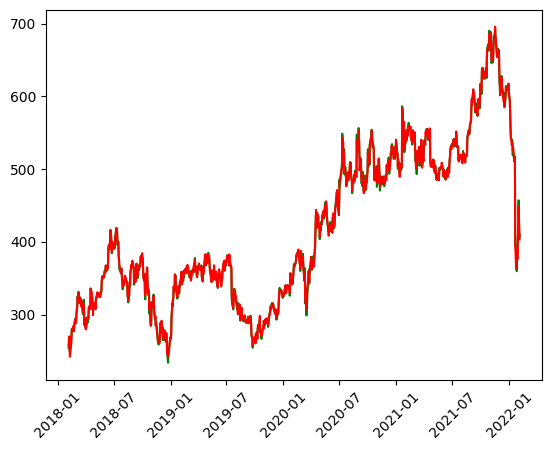

In [38]:
plt.plot(tested_data.Date, tested_data.Close, color="green")
plt.plot(tested_data.Date, tested_data.Close_predicted, color="red")
plt.xticks(rotation=45)

In [33]:
output=pd.DataFrame(tested_data[['Date','Close','Close_predicted']])

In [34]:
output

,Date,Close,Close_predicted
0,2018-02-05,254.259995,257.745323
1,2018-02-06,265.720001,261.665780
2,2018-02-07,264.559998,270.054022
3,2018-02-08,250.100006,254.031380
4,2018-02-09,249.470001,242.184414
...,...,...,...
1004,2022-01-31,427.140015,421.317175
1005,2022-02-01,457.130005,449.398036
1006,2022-02-02,429.480011,434.511102
1007,2022-02-03,405.600006,414.301072
